In [1]:
from greenlearning.utils import DataProcessor
from greenlearning.model import *
from chebpy2 import Chebfun2
import chebpy as cp
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = Model(loadPath = "savedmodel")

Metal device set to: Apple M1 Pro


In [3]:
prefx = cp.core.settings.ChebPreferences()
prefy = cp.core.settings.ChebPreferences()
prefx.eps = 1e-6
prefy.eps = 1e-6

In [4]:
%%time
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefx = prefx, prefy = prefy)

CPU times: user 439 ms, sys: 97.8 ms, total: 537 ms
Wall time: 447 ms


In [5]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

In [6]:
Gneural = model.evaluateG(x,y)

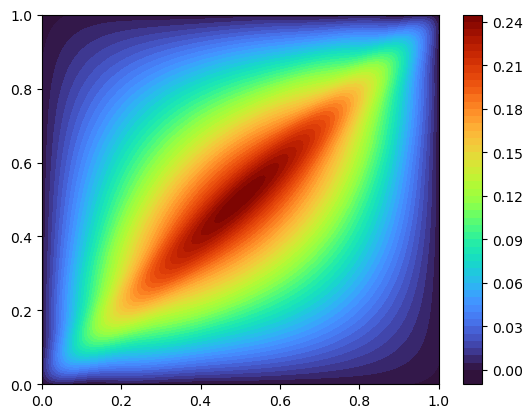

In [7]:
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = 0, vmax = np.max(Gneural))
plt.colorbar()

In [8]:
%%time
G = g[x,y]

CPU times: user 358 ms, sys: 17.1 ms, total: 375 ms
Wall time: 80.6 ms


In [9]:
%%time
G = g[x,y]

CPU times: user 316 ms, sys: 13.1 ms, total: 329 ms
Wall time: 83 ms


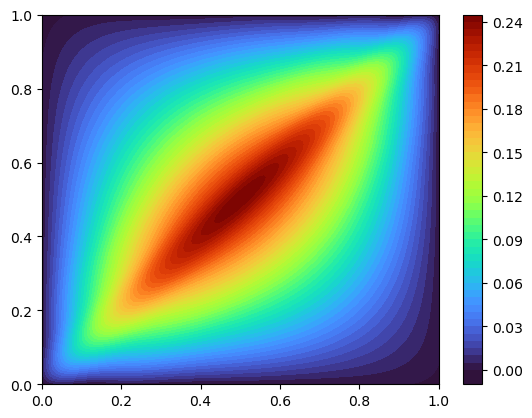

In [10]:
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = 0, vmax = np.max(G))
plt.colorbar()